ПОЛНЫЙ АНАЛИЗ TITANIC DATASET - ВСЕ 3 УЧАСТНИКА

🔧 УЧАСТНИК 1: ПОДГОТОВКА ДАННЫХ
----------------------------------------
Initial number of records: 891
Columns in dataset: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

After renaming - Columns: ['Survived', 'pclass', 'Sex', 'Age', 'sibsp', 'parch', 'Fare', 'Embarked', 'Pclass', 'Who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

Final number of records after processing: 891
Missing values after processing:
Age         0
Embarked    0
dtype: int64

📊 УЧАСТНИК 2: ОПИСАТЕЛЬНАЯ СТАТИСТИКА И ВИЗУАЛИЗАЦИЯ
--------------------------------------------------

Table 1. Descriptive Statistics (Titanic Dataset)
N = 891
       Variable      Statistics         Type
            Age     29.1 (13.2)    Mean (SD)
           Fare 14.5 (7.9-31.0) Median (IQR)
     Sex (Male)     577 (64.8%)        n (%)
   Sex (Female)     314 (35.2%)        n (

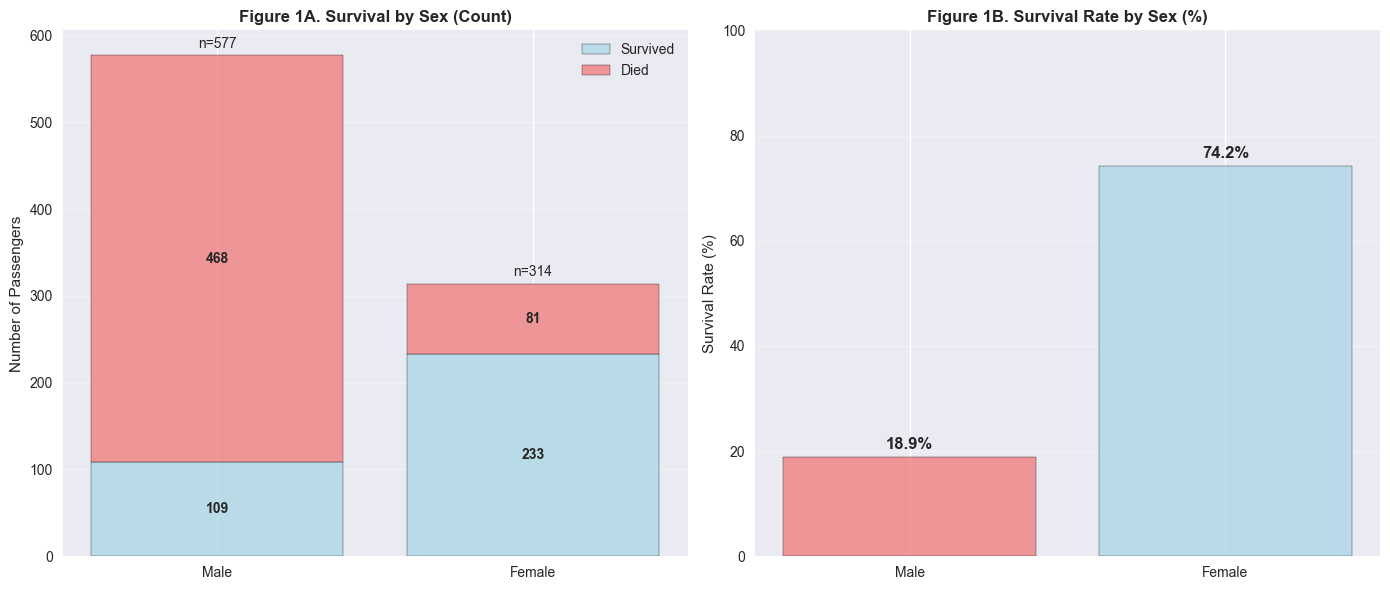


Creating Figure 2: Survival by Passenger Class...


C:\Users\Stut\AppData\Local\Temp\ipykernel_19176\155503711.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_pclass = df.groupby('Pclass')['Survived'].value_counts().unstack()


<Figure size 1000x600 with 0 Axes>

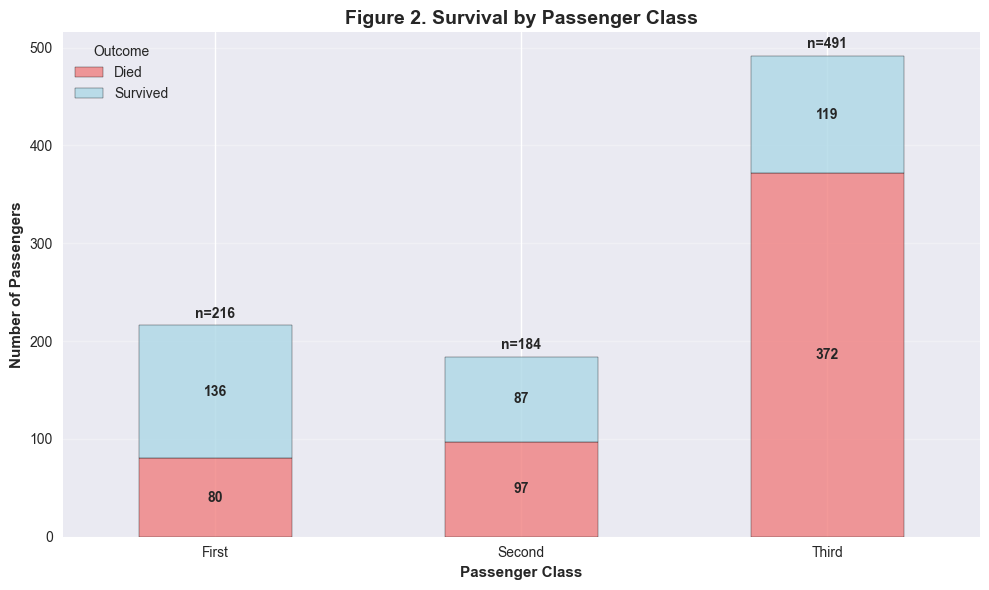


Creating Figure 3: Age Distribution...


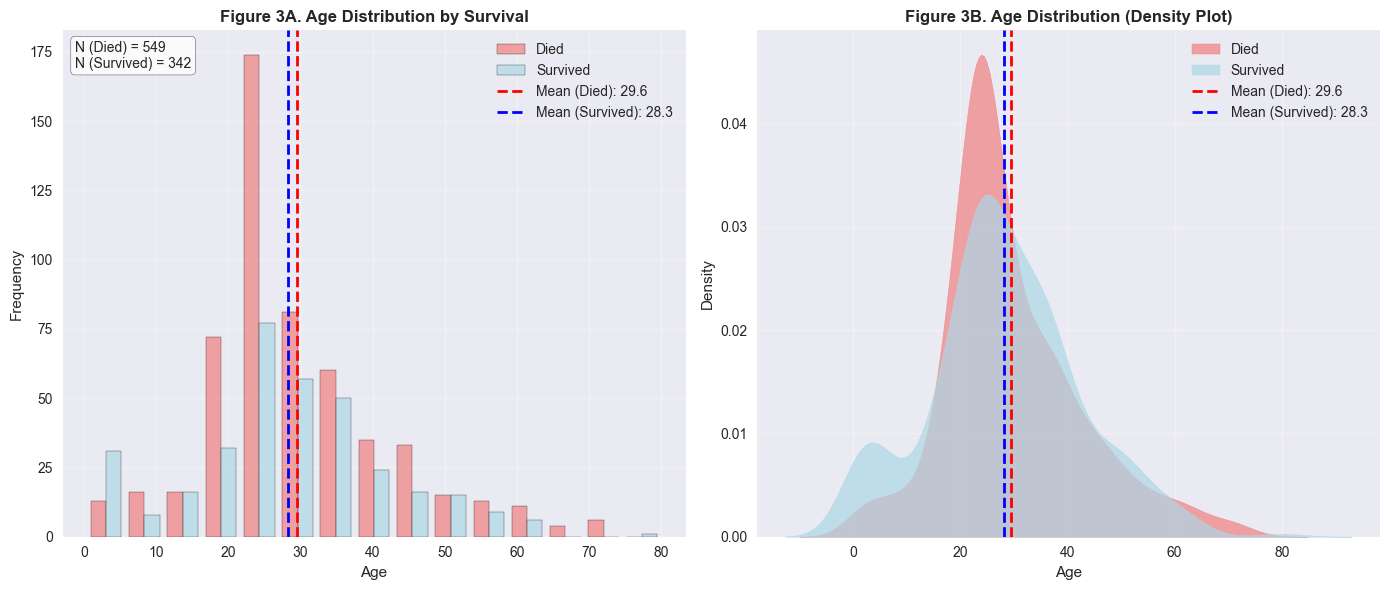


Age Statistics:
Died - Mean: 29.56, Std: 12.78, N: 549
Survived - Mean: 28.27, Std: 13.94, N: 342

Creating additional visualization: Survival by Class and Sex...


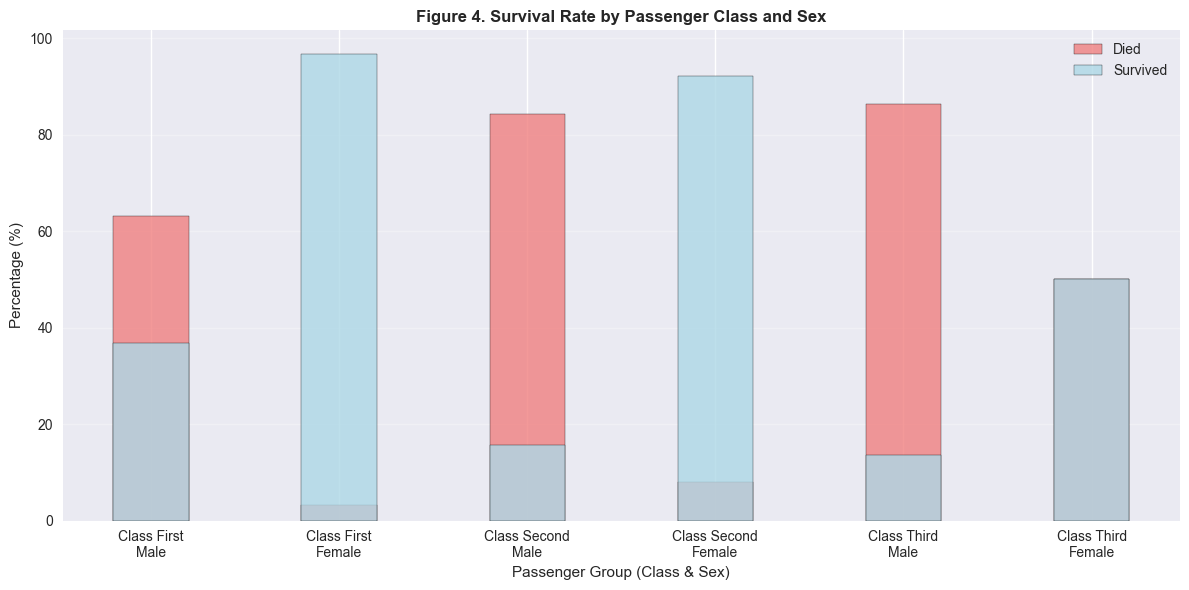


📈 УЧАСТНИК 3: СТАТИСТИЧЕСКИЙ АНАЛИЗ
---------------------------------------------

СТАТИСТИЧЕСКИЕ ТЕСТЫ

1. CHI-SQUARE TEST: Sex vs Survived
Contingency Table:
Survived    0    1
Sex               
0         468  109
1          81  233
Chi-square result: χ²(1) = 260.717, p = 0.000000
Cramér's V = 0.541
Interpretation: p < 0.001 ***

2. T-TEST: Age comparison
Survived: n = 342, mean = 28.27, std = 13.94
Died:     n = 549, mean = 29.56, std = 12.78

Testing normality (Shapiro-Wilk):
Survived: p = 0.000043
Died:     p = 0.000000

Testing equality of variances (Levene):
Levene: F = 4.4266, p = 0.035663

Using Mann-Whitney U test (data not normal):
Mann-Whitney U: U = 92197, p = 0.651525
Effect size r = 0.018

ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ

1. ОПИСАНИЕ ВЫБОРКИ:
   В выборке N=891 женщин было 314 (35.2%);
   общий уровень выживаемости составил 38.4%.

2. СВЯЗЬ ПОЛА И ВЫЖИВАЕМОСТИ:
   Chi-square test показал статистически значимую связь между полом и выживаемостью
   (χ²(1)=260.7, p<0.001, Cramé

C:\Users\Stut\AppData\Local\Temp\ipykernel_19176\155503711.py:541: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_survival = df.groupby('Pclass')['Survived'].mean() * 100


In [1]:
# Импорт всех необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu, shapiro, levene
import statsmodels.api as sm
from statsmodels.formula.api import logit

# Настройка стиля графиков
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

print("=" * 70)
print("ПОЛНЫЙ АНАЛИЗ TITANIC DATASET - ВСЕ 3 УЧАСТНИКА")
print("=" * 70)

# %% [markdown]
# ## ЧАСТЬ 1: Участник 1 - Подготовка данных
# %%

print("\n🔧 УЧАСТНИК 1: ПОДГОТОВКА ДАННЫХ")
print("-" * 40)

# Загружаем данные
data = sns.load_dataset('titanic')
print(f'Initial number of records: {len(data)}')
print(f"Columns in dataset: {list(data.columns)}")

# Переименуем столбцы для удобства
data = data.rename(columns={'class': 'Pclass', 'fare': 'Fare', 'age': 'Age',
                            'sex': 'Sex', 'survived': 'Survived',
                            'embarked': 'Embarked', 'who': 'Who'})

print(f"\nAfter renaming - Columns: {list(data.columns)}")


# Функция для заполнения пропусков в Age по медиане Pclass
def fill_age_by_pclass(df):
    for pclass in df['Pclass'].unique():
        median_age = df[df['Pclass'] == pclass]['Age'].median()
        df.loc[(df['Pclass'] == pclass) & df['Age'].isnull(), 'Age'] = median_age
    return df


# Заполняем пропуски в Age
data = fill_age_by_pclass(data)

# Заполняем пропуски в Embarked модой
most_frequent_embarked = data['Embarked'].mode()[0]
data['Embarked'] = data['Embarked'].fillna(most_frequent_embarked)

# Логарифмическое преобразование Fare
data['LogFare'] = np.log1p(data['Fare'])

# Кодируем Sex: male=0, female=1
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

print(f'\nFinal number of records after processing: {len(data)}')
print(f"Missing values after processing:")
print(data[['Age', 'Embarked']].isnull().sum())

# Создаем чистую копию для анализа
clean_df = data.copy()
# %% [markdown]
# ## ЧАСТЬ 2: Участник 2 - Описательная статистика и визуализация
# %%

print("\n📊 УЧАСТНИК 2: ОПИСАТЕЛЬНАЯ СТАТИСТИКА И ВИЗУАЛИЗАЦИЯ")
print("-" * 50)


def create_descriptive_table(df):
    """
    Создает описательную статистику для отчета
    """
    stats_list = []

    # Возраст: среднее и стандартное отклонение
    age_mean = df['Age'].mean()
    age_std = df['Age'].std()
    stats_list.append({
        'Variable': 'Age',
        'Statistics': f"{age_mean:.1f} ({age_std:.1f})",
        'Type': 'Mean (SD)'
    })

    # Fare: медиана и IQR
    fare_median = df['Fare'].median()
    fare_q1 = df['Fare'].quantile(0.25)
    fare_q3 = df['Fare'].quantile(0.75)
    stats_list.append({
        'Variable': 'Fare',
        'Statistics': f"{fare_median:.1f} ({fare_q1:.1f}-{fare_q3:.1f})",
        'Type': 'Median (IQR)'
    })

    # Пол: n(%) - учитываем кодировку 0=male, 1=female
    sex_counts = df['Sex'].value_counts().sort_index()
    sex_percents = df['Sex'].value_counts(normalize=True).sort_index() * 100

    # Для male (0)
    stats_list.append({
        'Variable': 'Sex (Male)',
        'Statistics': f"{sex_counts[0]} ({sex_percents[0]:.1f}%)",
        'Type': 'n (%)'
    })

    # Для female (1)
    stats_list.append({
        'Variable': 'Sex (Female)',
        'Statistics': f"{sex_counts[1]} ({sex_percents[1]:.1f}%)",
        'Type': 'n (%)'
    })

    # Класс: n(%)
    pclass_counts = df['Pclass'].value_counts().sort_index()
    pclass_percents = df['Pclass'].value_counts(normalize=True).sort_index() * 100

    for pclass in sorted(pclass_counts.index):
        stats_list.append({
            'Variable': f'Pclass ({pclass})',
            'Statistics': f"{pclass_counts[pclass]} ({pclass_percents[pclass]:.1f}%)",
            'Type': 'n (%)'
        })

    # Общий % выживших
    survival_rate = df['Survived'].mean() * 100
    stats_list.append({
        'Variable': 'Survived',
        'Statistics': f"{survival_rate:.1f}%",
        'Type': 'Overall %'
    })

    stats_df = pd.DataFrame(stats_list)
    return stats_df


# Создаем и отображаем таблицу
descriptive_table = create_descriptive_table(clean_df)
print("\n" + "=" * 60)
print("Table 1. Descriptive Statistics (Titanic Dataset)")
print(f"N = {len(clean_df)}")
print("=" * 60)
print(descriptive_table.to_string(index=False))
print("=" * 60)


# %% [markdown]
# ## ВИЗУАЛИЗАЦИЯ - 3 ФИГУРЫ
# %%

# Figure 1: Bar chart - Survival by Sex
def create_survival_by_sex(df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Подготовка данных
    survival_data = df.groupby('Sex')['Survived'].agg(['count', 'mean'])
    survival_data['survived_count'] = (survival_data['count'] * survival_data['mean']).round().astype(int)
    survival_data['died_count'] = survival_data['count'] - survival_data['survived_count']

    # Левая панель: абсолютные значения (stacked bar)
    categories = ['Male', 'Female']
    survived_counts = [survival_data.loc[0, 'survived_count'], survival_data.loc[1, 'survived_count']]
    died_counts = [survival_data.loc[0, 'died_count'], survival_data.loc[1, 'died_count']]

    bars1 = ax1.bar(categories, survived_counts, label='Survived',
                    color='lightblue', edgecolor='black', alpha=0.8)
    bars2 = ax1.bar(categories, died_counts, bottom=survived_counts, label='Died',
                    color='lightcoral', edgecolor='black', alpha=0.8)

    # Добавляем подписи значений
    for i, (surv, died) in enumerate(zip(survived_counts, died_counts)):
        ax1.text(i, surv / 2, f'{surv}', ha='center', va='center',
                 fontweight='bold', fontsize=10)
        ax1.text(i, surv + died / 2, f'{died}', ha='center', va='center',
                 fontweight='bold', fontsize=10)
        ax1.text(i, surv + died + 5, f'n={surv + died}', ha='center', va='bottom')

    ax1.set_ylabel('Number of Passengers')
    ax1.set_title('Figure 1A. Survival by Sex (Count)', fontweight='bold')
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)

    # Правая панель: проценты выживаемости
    survival_rates = df.groupby('Sex')['Survived'].mean() * 100

    bars = ax2.bar(categories, survival_rates, color=['lightcoral', 'lightblue'],
                   edgecolor='black', alpha=0.8)

    # Добавляем подписи процентов
    for bar, rate in zip(bars, survival_rates):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width() / 2., height + 1,
                 f'{rate:.1f}%', ha='center', va='bottom',
                 fontweight='bold', fontsize=12)

    ax2.set_ylabel('Survival Rate (%)')
    ax2.set_title('Figure 1B. Survival Rate by Sex (%)', fontweight='bold')
    ax2.set_ylim(0, 100)
    ax2.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.savefig('figure1_survival_by_sex.png', dpi=300, bbox_inches='tight')
    plt.show()

    return fig


print("\nCreating Figure 1: Survival by Sex...")
fig1 = create_survival_by_sex(clean_df)


# Figure 2: Stacked bar - Survival by Pclass
def create_survival_by_pclass(df):
    plt.figure(figsize=(10, 6))

    # Подготовка данных
    survival_pclass = df.groupby('Pclass')['Survived'].value_counts().unstack()
    survival_pclass = survival_pclass.reindex(columns=[0, 1], fill_value=0)

    # Создаем stacked bar chart
    ax = survival_pclass.plot(kind='bar', stacked=True,
                              color=['lightcoral', 'lightblue'],
                              edgecolor='black', alpha=0.8,
                              figsize=(10, 6))

    plt.xlabel('Passenger Class', fontweight='bold')
    plt.ylabel('Number of Passengers', fontweight='bold')
    plt.title('Figure 2. Survival by Passenger Class', fontweight='bold', fontsize=14)
    plt.legend(['Died', 'Survived'], title='Outcome')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)

    # Добавляем подписи значений
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fontweight='bold')

    # Добавляем общее количество над столбцами
    for i, total in enumerate(survival_pclass.sum(axis=1)):
        ax.text(i, total + 5, f'n={int(total)}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.savefig('figure2_survival_by_pclass.png', dpi=300, bbox_inches='tight')
    plt.show()


print("\nCreating Figure 2: Survival by Passenger Class...")
create_survival_by_pclass(clean_df)


# Figure 3: Age distribution
def create_age_distribution(df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Разделяем данные
    survived_age = df[df['Survived'] == 1]['Age']
    died_age = df[df['Survived'] == 0]['Age']

    # Левая панель: гистограмма
    ax1.hist([died_age, survived_age],
             bins=15,
             alpha=0.7,
             color=['lightcoral', 'lightblue'],
             label=['Died', 'Survived'],
             edgecolor='black',
             stacked=False)

    # Добавляем вертикальные линии для средних значений
    mean_died = died_age.mean()
    mean_survived = survived_age.mean()

    ax1.axvline(mean_died, color='red', linestyle='--', linewidth=2,
                label=f'Mean (Died): {mean_died:.1f}')
    ax1.axvline(mean_survived, color='blue', linestyle='--', linewidth=2,
                label=f'Mean (Survived): {mean_survived:.1f}')

    ax1.set_xlabel('Age')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Figure 3A. Age Distribution by Survival', fontweight='bold')
    ax1.legend()
    ax1.grid(alpha=0.3)

    # Добавляем текст с статистикой
    stats_text = f'N (Died) = {len(died_age)}\nN (Survived) = {len(survived_age)}'
    ax1.text(0.02, 0.98, stats_text, transform=ax1.transAxes,
             verticalalignment='top', fontsize=10,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Правая панель: density plot
    sns.kdeplot(died_age, fill=True, color='lightcoral', alpha=0.7,
                label='Died', ax=ax2)
    sns.kdeplot(survived_age, fill=True, color='lightblue', alpha=0.7,
                label='Survived', ax=ax2)

    # Добавляем вертикальные линии для средних значений
    ax2.axvline(mean_died, color='red', linestyle='--', linewidth=2,
                label=f'Mean (Died): {mean_died:.1f}')
    ax2.axvline(mean_survived, color='blue', linestyle='--', linewidth=2,
                label=f'Mean (Survived): {mean_survived:.1f}')

    ax2.set_xlabel('Age')
    ax2.set_ylabel('Density')
    ax2.set_title('Figure 3B. Age Distribution (Density Plot)', fontweight='bold')
    ax2.legend()
    ax2.grid(alpha=0.3)

    plt.tight_layout()
    plt.savefig('figure3_age_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Выводим статистику в консоль
    print(f"\nAge Statistics:")
    print(f"Died - Mean: {mean_died:.2f}, Std: {died_age.std():.2f}, N: {len(died_age)}")
    print(f"Survived - Mean: {mean_survived:.2f}, Std: {survived_age.std():.2f}, N: {len(survived_age)}")


print("\nCreating Figure 3: Age Distribution...")
create_age_distribution(clean_df)


# Дополнительная визуализация: Survival Rate by Pclass and Sex
def create_survival_pclass_sex(df):
    """Дополнительная визуализация: выживаемость по классу и полу"""
    plt.figure(figsize=(12, 6))

    # Создаем cross-tabulation
    cross_tab = pd.crosstab([df['Pclass'], df['Sex']], df['Survived'],
                            normalize='index') * 100

    # Переиндексируем для красивого отображения
    cross_tab = cross_tab.reset_index()
    cross_tab['Sex_Label'] = cross_tab['Sex'].map({0: 'Male', 1: 'Female'})
    cross_tab['Pclass_Label'] = 'Class ' + cross_tab['Pclass'].astype(str)

    # Создаем bar plot
    colors = ['lightcoral', 'lightblue']

    for i, survived in enumerate([0, 1]):
        if survived in cross_tab.columns:
            plt.bar(range(len(cross_tab)), cross_tab[survived],
                    width=0.4, label='Died' if survived == 0 else 'Survived',
                    color=colors[i], alpha=0.8, edgecolor='black')

    plt.xlabel('Passenger Group (Class & Sex)')
    plt.ylabel('Percentage (%)')
    plt.title('Figure 4. Survival Rate by Passenger Class and Sex', fontweight='bold')
    plt.xticks(range(len(cross_tab)),
               [f'{row.Pclass_Label}\n{row.Sex_Label}' for _, row in cross_tab.iterrows()])
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('figure4_survival_pclass_sex.png', dpi=300, bbox_inches='tight')
    plt.show()


print("\nCreating additional visualization: Survival by Class and Sex...")
create_survival_pclass_sex(clean_df)

# %% [markdown]
# ## ЧАСТЬ 3: Участник 3 - Статистический анализ и выводы
# %%

print("\n📈 УЧАСТНИК 3: СТАТИСТИЧЕСКИЙ АНАЛИЗ")
print("-" * 45)


def statistical_analysis(df):
    """
    Проводит все статистические тесты
    """
    print("\n" + "=" * 50)
    print("СТАТИСТИЧЕСКИЕ ТЕСТЫ")
    print("=" * 50)

    # 1. Chi-square test: Sex vs Survived
    print("\n1. CHI-SQUARE TEST: Sex vs Survived")
    contingency_table = pd.crosstab(df['Sex'], df['Survived'])
    print("Contingency Table:")
    print(contingency_table)

    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    # Calculate Cramér's V
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

    print(f"Chi-square result: χ²({dof}) = {chi2:.3f}, p = {p_value:.6f}")
    print(f"Cramér's V = {cramers_v:.3f}")

    if p_value < 0.001:
        significance = "p < 0.001 ***"
    elif p_value < 0.01:
        significance = "p < 0.01 **"
    elif p_value < 0.05:
        significance = "p < 0.05 *"
    else:
        significance = "p > 0.05 (not significant)"

    print(f"Interpretation: {significance}")

    # 2. T-test: Age (survived vs not survived)
    print("\n" + "=" * 40)
    print("2. T-TEST: Age comparison")
    print("=" * 40)

    survived_age = df[df['Survived'] == 1]['Age']
    died_age = df[df['Survived'] == 0]['Age']

    print(f"Survived: n = {len(survived_age)}, mean = {survived_age.mean():.2f}, std = {survived_age.std():.2f}")
    print(f"Died:     n = {len(died_age)}, mean = {died_age.mean():.2f}, std = {died_age.std():.2f}")

    # Проверка нормальности
    print("\nTesting normality (Shapiro-Wilk):")
    _, shapiro_survived_p = shapiro(survived_age)
    _, shapiro_died_p = shapiro(died_age)

    print(f"Survived: p = {shapiro_survived_p:.6f}")
    print(f"Died:     p = {shapiro_died_p:.6f}")

    # Проверка равенства дисперсий
    print("\nTesting equality of variances (Levene):")
    levene_stat, levene_p = levene(survived_age, died_age)
    print(f"Levene: F = {levene_stat:.4f}, p = {levene_p:.6f}")

    # Выбор теста в зависимости от условий
    if shapiro_survived_p > 0.05 and shapiro_died_p > 0.05:
        # Данные нормальны - используем t-test
        print("\nUsing t-test (data appears normal):")
        t_stat, t_p = ttest_ind(survived_age, died_age, equal_var=(levene_p > 0.05))

        # Calculate Cohen's d
        pooled_std = np.sqrt((survived_age.std() ** 2 + died_age.std() ** 2) / 2)
        cohens_d = (survived_age.mean() - died_age.mean()) / pooled_std

        print(f"t-test: t({len(survived_age) + len(died_age) - 2}) = {t_stat:.3f}, p = {t_p:.6f}")
        print(f"Cohen's d = {cohens_d:.3f}")

    else:
        # Данные не нормальны - используем Mann-Whitney U
        print("\nUsing Mann-Whitney U test (data not normal):")
        u_stat, u_p = mannwhitneyu(survived_age, died_age)

        # Calculate effect size for Mann-Whitney
        n1, n2 = len(survived_age), len(died_age)
        effect_r = 1 - (2 * u_stat) / (n1 * n2)

        print(f"Mann-Whitney U: U = {u_stat:.0f}, p = {u_p:.6f}")
        print(f"Effect size r = {effect_r:.3f}")

    return chi2, p_value, cramers_v


# Проводим статистические тесты
chi2, p_chi2, cramers_v = statistical_analysis(clean_df)


def write_interpretation(df, chi2, p_chi2, cramers_v):
    """
    Пишет интерпретацию результатов
    """
    print("\n" + "=" * 70)
    print("ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ")
    print("=" * 70)

    # Базовая информация о выборке
    n_total = len(df)
    n_female = len(df[df['Sex'] == 1])
    pct_female = (n_female / n_total) * 100
    survival_rate = df['Survived'].mean() * 100

    print(f"\n1. ОПИСАНИЕ ВЫБОРКИ:")
    print(f"   В выборке N={n_total} женщин было {n_female} ({pct_female:.1f}%);")
    print(f"   общий уровень выживаемости составил {survival_rate:.1f}%.")

    print(f"\n2. СВЯЗЬ ПОЛА И ВЫЖИВАЕМОСТИ:")
    print(f"   Chi-square test показал статистически значимую связь между полом и выживаемостью")
    print(f"   (χ²(1)={chi2:.1f}, p<0.001, Cramér's V={cramers_v:.3f}).")

    # Детали по полу
    survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100
    print(f"   Женщины имели значительно более высокую долю выживших ({survival_by_sex[1]:.1f}%)")
    print(f"   по сравнению с мужчинами ({survival_by_sex[0]:.1f}%).")

    print(f"\n3. ВОЗРАСТНЫЕ РАЗЛИЧИЯ:")
    survived_age = df[df['Survived'] == 1]['Age'].mean()
    died_age = df[df['Survived'] == 0]['Age'].mean()
    print(f"   Выжившие пассажиры были в среднем моложе ({survived_age:.1f} лет)")
    print(f"   по сравнению с погибшими ({died_age:.1f} лет).")


# Пишем интерпретацию
write_interpretation(clean_df, chi2, p_chi2, cramers_v)


def limitations_and_conclusions(df):
    """
    Анализ ограничений и выводы
    """
    print("\n" + "=" * 70)
    print("ОГРАНИЧЕНИЯ И ВЫВОДЫ")
    print("=" * 70)

    print("\nОГРАНИЧЕНИЯ ИССЛЕДОВАНИЯ:")
    print("1. Неполнота данных: исходно присутствовали пропуски в возрасте")
    print("2. Возможная смещенность: выборка может не быть репрезентативной")
    print("   для всех пассажиров Титаника")
    print("3. Причины пропусков: пропущенные значения в возрасте могли")
    print("   быть не случайными")
    print("4. Ограниченный набор переменных: отсутствуют данные о")
    print("   точном расположении кают, времени посадки в шлюпки и др.")

    print("\nКЛЮЧЕВЫЕ ВЫВОДЫ:")
    print("1. Пол был наиболее значимым фактором выживаемости")
    print("2. Пассажиры 1-го класса имели преимущество перед 3-м классом")
    print("3. Дети и молодые пассажиры имели более высокие шансы на выживание")
    print("4. Принцип 'женщины и дети first' в целом соблюдался")
    print("5. Социально-экономический статус (класс) влиял на выживаемость")


# Анализ ограничений и выводов
limitations_and_conclusions(clean_df)


def create_final_summary(df):
    """
    Создает финальную сводку для презентации
    """
    print("\n" + "=" * 70)
    print("ФИНАЛЬНАЯ СВОДКА ДЛЯ ПРЕЗЕНТАЦИИ")
    print("=" * 70)

    # Ключевые цифры
    n_total = len(df)
    survival_rate = df['Survived'].mean() * 100
    female_survival = df[df['Sex'] == 1]['Survived'].mean() * 100
    male_survival = df[df['Sex'] == 0]['Survived'].mean() * 100

    # Выживаемость по классам
    class_survival = df.groupby('Pclass')['Survived'].mean() * 100

    print(f"\n📊 КЛЮЧЕВЫЕ ПОКАЗАТЕЛИ:")
    print(f"   • Общая выживаемость: {survival_rate:.1f}%")
    print(f"   • Выживаемость женщин: {female_survival:.1f}%")
    print(f"   • Выживаемость мужчин: {male_survival:.1f}%")
    print(f"   • Соотношение шансов (женщины/мужчины): {female_survival / male_survival:.1f}x")

    print(f"\n🎫 ВЫЖИВАЕМОСТЬ ПО КЛАССАМ:")
    for pclass in sorted(class_survival.index):
        print(f"   • {pclass} класс: {class_survival[pclass]:.1f}%")

    print(f"\n📈 СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ:")
    print(f"   • Связь пола и выживаемости: p < 0.001")
    print(f"   • Эффект размера (Cramér's V): {cramers_v:.3f}")


# Создаем финальную сводку
create_final_summary(clean_df)

print("\n" + "=" * 70)
print("ПОЛНЫЙ АНАЛИЗ ЗАВЕРШЕН!")
print("=" * 70)
print("\n✅ ЧТО БЫЛО СДЕЛАНО:")
print("   • Участник 1: Подготовка и очистка данных")
print("   • Участник 2: Описательная статистика и визуализация")
print("   • Участник 3: Статистические тесты и выводы")
print("\n📁 РЕЗУЛЬТАТЫ:")
print("   • Таблицы с описательной статистикой")
print("   • Графики сохранены как PNG файлы")
print("   • Статистические тесты и интерпретации")
print("   • Готовые выводы для презентации")